# COVID-19 DATASET

## Analyzing data using Numpy,Pandas,Matplotib library

The data is downloaded from Kaggle in csv format

## Analysis Of Dataset


In [11]:
import pandas as pd

In [33]:
data=pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\covid\covid_19_data.csv")

In [35]:
data

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


### 1. Checking for missing values

In [38]:
print(data.isnull().sum())

Province/State    34404
Country/Region        0
Lat                   0
Long                  0
Date                  0
Confirmed             0
Deaths                0
Recovered             0
Active                0
WHO Region            0
dtype: int64


### 2. Basic statistics


In [41]:
print(data.describe())

                Lat          Long     Confirmed         Deaths     Recovered  \
count  49068.000000  49068.000000  4.906800e+04   49068.000000  4.906800e+04   
mean      21.433730     23.528236  1.688490e+04     884.179160  7.915713e+03   
std       24.950320     70.442740  1.273002e+05    6313.584411  5.480092e+04   
min      -51.796300   -135.000000  0.000000e+00       0.000000  0.000000e+00   
25%        7.873054    -15.310100  4.000000e+00       0.000000  0.000000e+00   
50%       23.634500     21.745300  1.680000e+02       2.000000  2.900000e+01   
75%       41.204380     80.771797  1.518250e+03      30.000000  6.660000e+02   
max       71.706900    178.065000  4.290259e+06  148011.000000  1.846641e+06   

             Active  
count  4.906800e+04  
mean   8.085012e+03  
std    7.625890e+04  
min   -1.400000e+01  
25%    0.000000e+00  
50%    2.600000e+01  
75%    6.060000e+02  
max    2.816444e+06  


### 3. First and last reported days

In [50]:
data['Date'] = pd.to_datetime(data['Date'])
first_date = data['Date'].min()
last_date = data['Date'].max()
print(f"First reported case date: {first_date}")
print(f"Last reported case date: {last_date}")


First reported case date: 2020-01-22 00:00:00
Last reported case date: 2020-07-27 00:00:00


### 4. What are the top 5 countries with the highest total confirmed cases?

In [57]:

total_confirmed = data.groupby('Country/Region')['Confirmed'].sum().sort_values(ascending=False)
print("Top 5 countries with the highest confirmed cases:")
print(total_confirmed.head(5))


Top 5 countries with the highest confirmed cases:
Country/Region
US        224345948
Brazil     89524967
Russia     45408411
India      40883464
Spain      27404045
Name: Confirmed, dtype: int64


### 5.  What is the total number of cases, deaths, and recoveries globally?

In [60]:
total_cases = data['Confirmed'].sum()
total_deaths = data['Deaths'].sum()
total_recoveries = data['Recovered'].sum()
print(f"Total Cases: {total_cases}")
print(f"Total Deaths: {total_deaths}")
print(f"Total Recoveries: {total_recoveries}")


Total Cases: 828508482
Total Deaths: 43384903
Total Recoveries: 388408229


### 6. What are the mean and standard deviation of active cases across countries?

In [70]:
mean_active = data['Active'].mean()
std_active = data['Active'].std()
print(f"Mean Active Cases: {mean_active:.2f}")
print(f"Standard Deviation of Active Cases: {std_active:.2f}")



Mean Active Cases: 8085.01
Standard Deviation of Active Cases: 76258.90


### 7. Total Confirmed COVID-19 cases by WHO Region


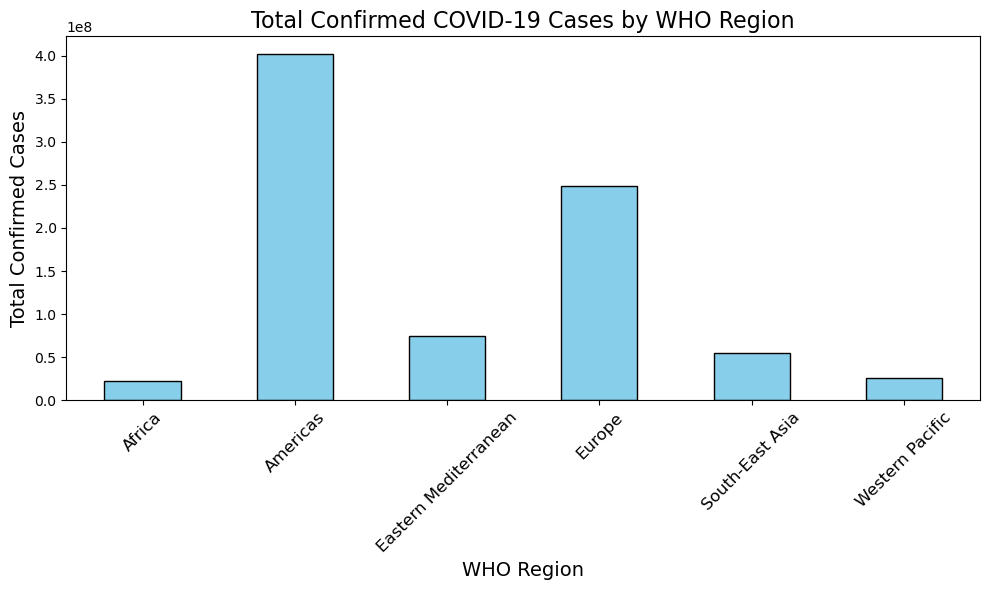

In [90]:
import matplotlib.pyplot as plt
region_cases = data.groupby('WHO Region')['Confirmed'].sum()
plt.figure(figsize=(10, 6))
region_cases.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Total Confirmed COVID-19 Cases by WHO Region', fontsize=16)
plt.xlabel('WHO Region', fontsize=14)
plt.ylabel('Total Confirmed Cases', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.tight_layout()
plt.show()


### 8. Distribution of Deaths by WHO region


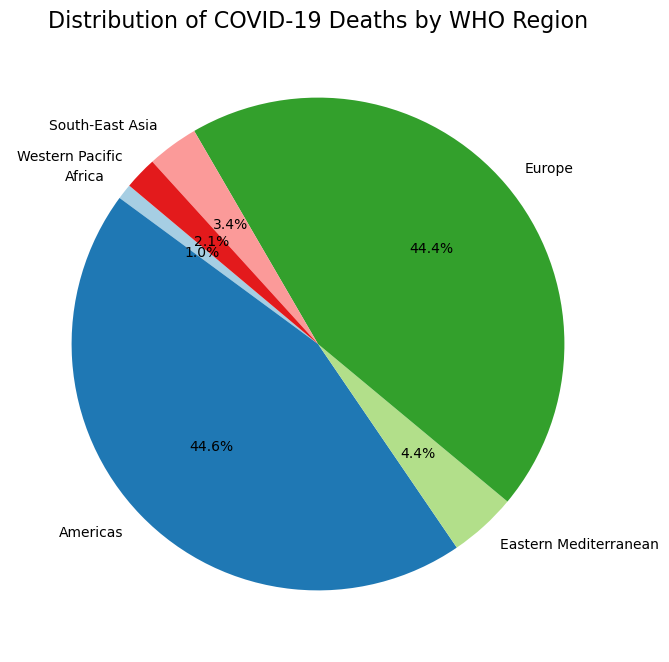

In [96]:
import matplotlib.pyplot as plt
region_deaths = data.groupby('WHO Region')['Deaths'].sum()
plt.figure(figsize=(8, 8))
plt.pie(region_deaths, labels=region_deaths.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Distribution of COVID-19 Deaths by WHO Region', fontsize=16)
plt.show()


### 9. Basic statistics and mathematical operation using numpy.

In [99]:
import numpy as np
deaths = data['Deaths'].values
total_deaths = np.sum(deaths)
average_deaths = np.mean(deaths)
median_deaths = np.median(deaths)
max_deaths = np.max(deaths)
min_deaths = np.min(deaths)
print("COVID-19 Death Statistics:")
print(f"Total Deaths: {total_deaths}")
print(f"Average Deaths: {average_deaths:.2f}")
print(f"Median Deaths: {median_deaths}")
print(f"Maximum Deaths: {max_deaths}")
print(f"Minimum Deaths: {min_deaths}")


COVID-19 Death Statistics:
Total Deaths: 43384903
Average Deaths: 884.18
Median Deaths: 2.0
Maximum Deaths: 148011
Minimum Deaths: 0


### 10. Graph showing the trend of Confirmed COVID-19 cases over time for a specific country.

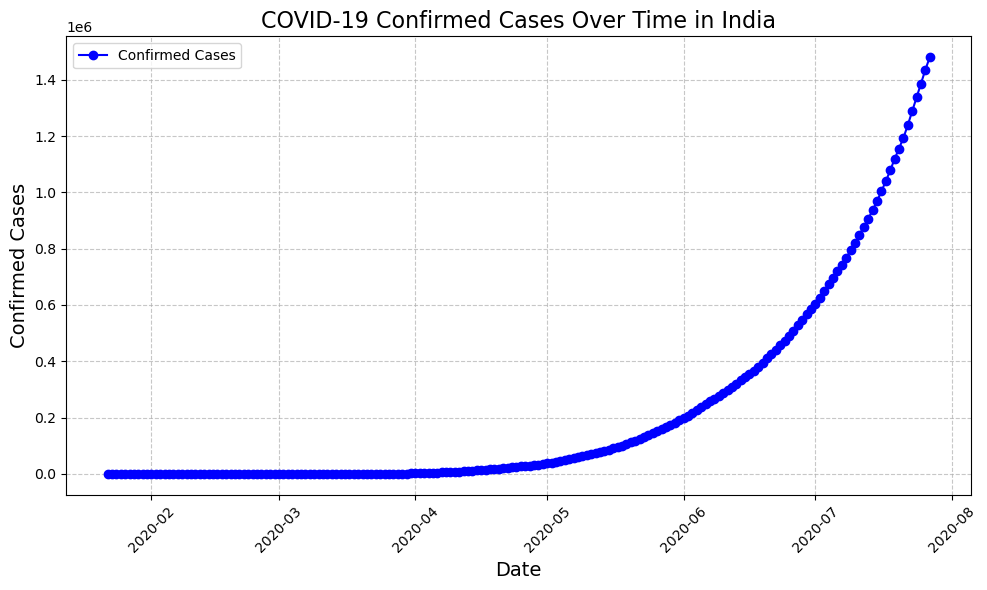

In [102]:
import matplotlib.pyplot as plt
country_data = data[data['Country/Region'] == 'India']
x = country_data['Date']
y = country_data['Confirmed']
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='blue', label='Confirmed Cases')
plt.title('COVID-19 Confirmed Cases Over Time in India', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Confirmed Cases', fontsize=14)
plt.xticks(rotation=45, fontsize=10)
plt.legend()
plt.grid(linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
